<h1 align=center><font size = 10> Classification with Python</font></h1>

In this notebook, we try to practice all the classification algorithms that we have learned in this course.

We load a dataset using the Pandas library, and apply the following algorithms, and find the best one for this specific dataset by accuracy evaluation methods.

Lets first load required libraries:

In [1]:
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline
%matplotlib inline

# Mandatory part (85%  of the total score)

## About dataset

The Pima is a group of Native Americans living in Arizona. A genetic predisposition allowed this group to survive normally to a diet poor of carbohydrates for years. In recent years, a sudden shift from traditional agricultural crops to processed foods, together with a decline in physical activity, has made them develop the highest prevalence of type 2 diabetes and for this reason, they have been subject of many studies.

The dataset includes data from 768 women with 8 characteristics, in particular:

- Number of times pregnant
- Plasma glucose concentration a 2 hours in an oral glucose tolerance test
- Diastolic blood pressure (mm Hg)
- Triceps skinfold thickness (mm)
- 2-Hour serum insulin (mu U/ml)
- Body mass index (weight in kg/(height in m)^2)
- Diabetes pedigree function
- Age (years)
- The last column of the dataset indicates if the person has been diagnosed with diabetes (1) or not (0)

## The problem:

The type of dataset and problem is a classic supervised binary classification. Given a number of elements with certain characteristics (features), we want to build a machine learning model to identify people affected by type 2 diabetes.

To solve the problem we will have to analyze the data, do any required transformation and nomarlization, apply a machine learning algorithm, train a model, check the performance of the trained model and iterate with other algorithms until we find the most performant for our type of dataset.

## Load Data From CSV File  

### 1. Load the dataset from the 'pima-indians-diabetes.csv' file.

Because the CSV doesn't contain any header, we add column names using the description from the original dataset website:

dataset.columns = ["NumTimesPrg", "PlGlcConc", "BloodP", "SkinThick", "TwoHourSerIns", "BMI", "DiPedFunc", "Age", "HasDiabetes"]

In [2]:
#TO DO:
dataset = pd.read_csv('pima-indians-diabetes.csv', header=None)
dataset.columns = [
    "NumTimesPrg", "PlGlcConc", "BloodP",
    "SkinThick", "TwoHourSerIns", "BMI",
    "DiPedFunc", "Age", "HasDiabetes"]


## Inspect the Dataset

### 2. Print out the shape of the dataset: we have 768 rows and 9 columns. Then, print out the head of the dataset to better understand the data format.

The first 8 columns are features while the last one is the supervised label (1 = has diabetes, 0 = no diabetes)

In [3]:
dataset.shape

(768, 9)

In [4]:
dataset.head(10)

,NumTimesPrg,PlGlcConc,BloodP,SkinThick,TwoHourSerIns,BMI,DiPedFunc,Age,HasDiabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [5]:
#TO DO:
# Number of times pregnant
# Plasma glucose concentration a 2 hours in an oral glucose tolerance test
# Diastolic blood pressure (mm Hg)
# Triceps skinfold thickness (mm)
# 2-Hour serum insulin (mu U/ml)
# Body mass index (weight in kg/(height in m)^2)
# Diabetes pedigree function
# Age (years)

# Data visualization and pre-processing



## Data correlation matrix
### 3. Let's calculate the correlation matrix for our dataset.

The correlation matrix is an important tool to understand the correlation between the different characteristics. The values range from -1 to 1 and the closer a value is to 1 the better correlation there is between two characteristics. 

In [6]:
#TO DO:
corr = dataset.corr()
corr

,NumTimesPrg,PlGlcConc,BloodP,SkinThick,TwoHourSerIns,BMI,DiPedFunc,Age,HasDiabetes
NumTimesPrg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
PlGlcConc,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodP,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThick,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
TwoHourSerIns,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiPedFunc,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
HasDiabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


### 4. Render the corr matrix using the heatmap in seaborn.

<AxesSubplot:>

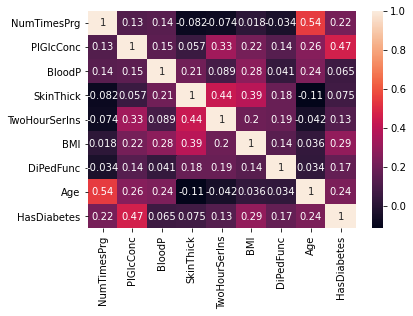

In [7]:
#TO DO:
import seaborn as sns
sns.heatmap(corr, annot = True)


### 5. Print out the column which has the biggest corr number with 'HasDiabetes'.

In [8]:
sorted_corr = corr.unstack().sort_values()
sorted_corr = pd.DataFrame(sorted_corr['HasDiabetes'])

In [9]:
# We have to exclude the column HasDiabetes which has the highest value - 1.0. So we will choose -2 after sort the list 
print("The column which has the bigggest corr number with 'HasDiabetes' is " + sorted_corr.index[-2] + " with " + str(sorted_corr.iloc[-2][0]))

The column which has the bigggest corr number with 'HasDiabetes' is PlGlcConc with 0.46658139830687373


## Visualize the Dataset
Visualizing the data is an important step of the data analysis. With a graphical visualization of the data, we have a better understanding of the various features values distribution: for example, we can understand the average age of the people or the average BMI, etc...

We could, of course, limit our inspection to the table visualization, but we could miss important things that may affect our model precision.
### 6. Manipulate histogram to represent all data columns in the dataset.

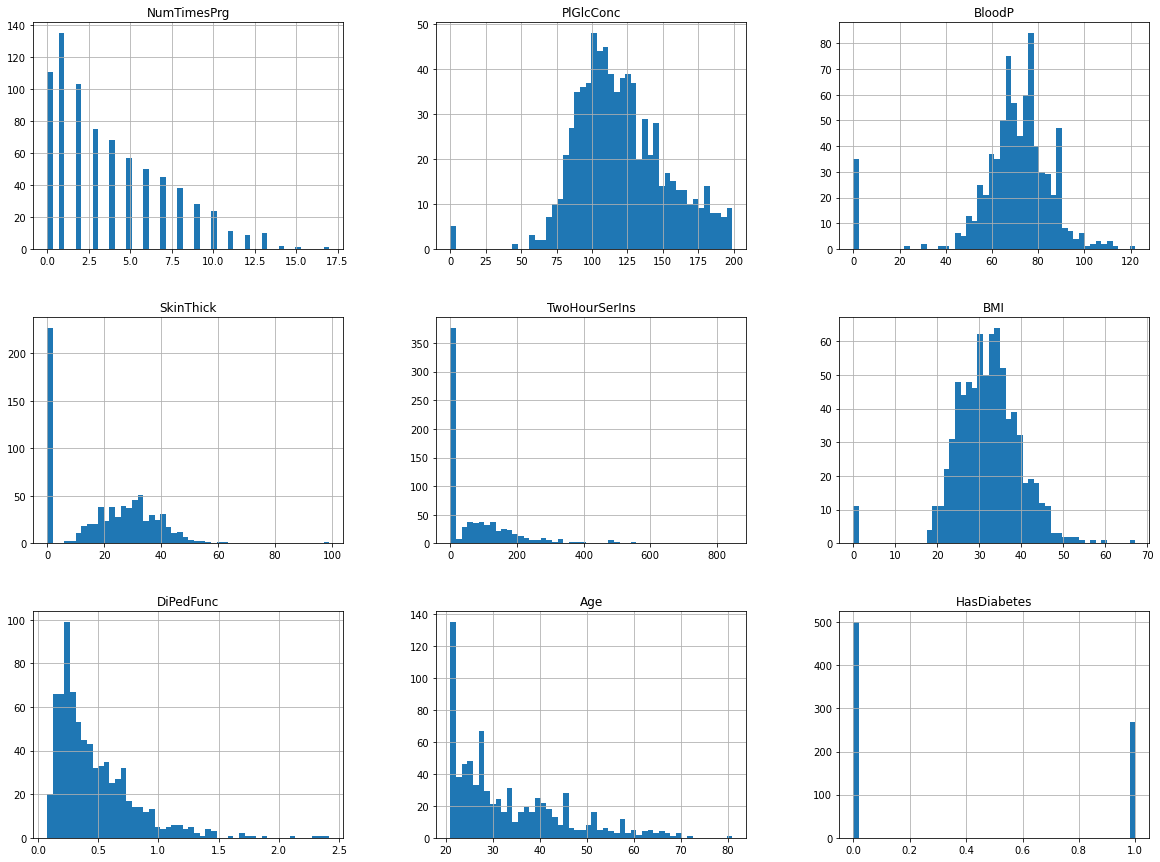

In [10]:
#TO DO:
dataset.hist(bins=50, figsize=(20, 15))
plt.show()

An important thing I notice in the dataset (and that wasn't obvious at the beginning) is the fact that some people have null (zero) values for some of the features: it's not quite possible to have 0 for BMI or the blood pressure.

How can we deal with similar values? We will see it later during the data transformation phase.

## Data cleaning and transformation

We have noticed from the previous analysis that some patients have missing data for some of the features. Machine learning algorithms don't work very well when the data are missing so we have to find a solution to "clean" the data we have.

The easiest option could be to eliminate all those patients with null/zero values, but in this way, we would eliminate a lot of important data.

Another option is to calculate the median value for a specific column and substitute that value everywhere (in the same column) we have zero or null. Let's see how to apply this second method.

### 7. Interpolate missing values on ['BMI', 'BloodP', 'PlGlcConc', 'SkinThick',  'TwoHourSerIns'] using median values or any other way which is effective.

We haven't transformed all the columns, because of some values which can make sense to be zero (like "Number of times pregnant").

In [11]:
#TO DO:
#there is no missing value in the dataset
dataset.isnull().value_counts()

NumTimesPrg  PlGlcConc  BloodP  SkinThick  TwoHourSerIns  BMI    DiPedFunc  Age    HasDiabetes
False        False      False   False      False          False  False      False  False          768
dtype: int64

In [12]:
# Find median value for each column
med_BMI = dataset['BMI'].median()
med_BloodP = dataset['BloodP'].median()
med_PlGlcConc = dataset['PlGlcConc'].median()
med_SkinThick = dataset['SkinThick'].median()
med_TwoHourSerIns = dataset['TwoHourSerIns'].median()

In [13]:
# Replace 0.0 with median value
dataset['BMI'] = dataset['BMI'].replace(to_replace=0, value=med_BMI)
dataset['BloodP'] = dataset['BloodP'].replace(to_replace=0, value=med_BloodP)
dataset['PlGlcConc'] = dataset['PlGlcConc'].replace(to_replace=0, value=med_PlGlcConc)
dataset['SkinThick'] = dataset['SkinThick'].replace(to_replace=0, value=med_SkinThick)
dataset['TwoHourSerIns'] = dataset['TwoHourSerIns'].replace(to_replace=0, value=med_TwoHourSerIns)

## Normalize Data 

One of the most important data transformations we need to apply is the features scaling. Basically, most of the machine learning algorithms don't work very well if the features have a different set of values. In our case, for example, the Age ranges from 20 to 80 years old, while the number of times a patient has been pregnant ranges from 0 to 17. For this reason, we need to apply a proper transformation.

### 8. Execute Data Standardization using data zero mean and unit variance (don't forget to remove ground truth column before scaling).

In [14]:
X = dataset[['NumTimesPrg','PlGlcConc','BloodP','SkinThick','TwoHourSerIns','BMI','DiPedFunc','Age']]
X

,NumTimesPrg,PlGlcConc,BloodP,SkinThick,TwoHourSerIns,BMI,DiPedFunc,Age
0,6,148,72,35,30.5,33.6,0.627,50
1,1,85,66,29,30.5,26.6,0.351,31
2,8,183,64,23,30.5,23.3,0.672,32
3,1,89,66,23,94.0,28.1,0.167,21
4,0,137,40,35,168.0,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180.0,32.9,0.171,63
764,2,122,70,27,30.5,36.8,0.340,27
765,5,121,72,23,112.0,26.2,0.245,30
766,1,126,60,23,30.5,30.1,0.349,47


In [15]:
y = dataset['HasDiabetes']
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: HasDiabetes, Length: 768, dtype: int64

In [16]:
#TO DO:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[ 0.63994726,  0.86604475, -0.03198993,  0.83111367, -0.60820096,
         0.16724016,  0.46849198,  1.4259954 ],
       [-0.84488505, -1.20506583, -0.5283186 ,  0.1805664 , -0.60820096,
        -0.85155088, -0.36506078, -0.19067191],
       [ 1.23388019,  2.01666174, -0.69376149, -0.46998087, -0.60820096,
        -1.33183808,  0.60439732, -0.10558415],
       [-0.84488505, -1.07356674, -0.5283186 , -0.46998087, -0.00618459,
        -0.63323851, -0.92076261, -1.04154944],
       [-1.14185152,  0.50442227, -2.67907616,  0.83111367,  0.69537779,
         1.54988514,  5.4849091 , -0.0204964 ]])

# Splitting the Dataset

Now that we have transformed the data, we need to split the dataset into two parts: a training dataset and a test dataset. Splitting the dataset is a very important step for supervised machine learning models. Basically, we are going to use the first part to train the model (ignoring the column with the pre-assigned label), then we use the trained model to make predictions on new data (which is the test dataset, not part of the training set) and compare the predicted value with the pre-assigned label.

### 9. Split the dataset into 80/20 using the stratified technique and random_state=7.

In [17]:
# Split the training dataset in 80% / 20%
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (614, 8) (614,)
Test set: (154, 8) (154,)


# Additional Question: 
### Why should we perform data normalization and data splitting before the training step?
Type your answer in the cell bellow as the markdown format.

### TO DO:


### 10. Print out the proportion of positive/total women who have diabetes on the full dataset, training dataset, and testing dataset.

In [18]:
pro_dbs_full = dataset.loc[dataset['HasDiabetes'] == 1].shape[0] / dataset.shape[0] * 100
pro_dbs_full

34.89583333333333

In [19]:
pro_dbs_train = y_train.loc[y_train == 1].shape[0] / y_train.shape[0] * 100
pro_dbs_train

34.36482084690554

In [20]:
pro_dbs_test = y_test.loc[y_test == 1].shape[0] / y_test.shape[0] * 100
pro_dbs_test

37.01298701298701

# Classification 

Now, it is your turn, use the training set to build an accurate model. Then use the test set to report the accuracy of the model.

You should use the following algorithms:
- K Nearest Neighbor(KNN)
- Decision Tree
- Support Vector Machine
- Logistic Regression
- Soft voting
- Hard voting



**__ Notes:__**

- You must try to **FINE TUNE AT LEAST 3 PARAMETERS** on each algorithm, except on soft voting and hard voting.
- You can go above and change the pre-processing, feature selection, feature extraction, and so on, to make a better model.
- You should use either scikit-learn, Scipy or Numpy libraries for developing the classification algorithms.
- You should include the code of the algorithm in the following cells.

# Import Evaluation Metrices

In [21]:
from sklearn.metrics import jaccard_score, f1_score

In [22]:
# a dictionary for keeping all scores of the classifiers
f1_scores = {'train':{'KNN': 0, 'DT': 0, 'SVM': 0, 'LR': 0, 'EN_HARD': 0, 'EN_SOFT': 0},
             'test':{'KNN': 0, 'DT': 0, 'SVM': 0, 'LR': 0, 'EN_HARD': 0, 'EN_SOFT': 0}}
jaccard_scores = {'train':{'KNN': 0, 'DT': 0, 'SVM': 0, 'LR': 0, 'EN_HARD': 0, 'EN_SOFT': 0}, 
                  'test':{'KNN': 0, 'DT': 0, 'SVM': 0, 'LR': 0, 'EN_HARD': 0, 'EN_SOFT': 0}}


# K Nearest Neighbor(KNN)
### 11. Finetune at least 3 parameters to get the KNN model with best accuracy. Then, print out the KNN model's parameters with the best accuracy(best estimator).
Hint: Using GridSearchCV in sklearn.model_selection.

**Warning:** You should not use the test data for finding the best parameters.

In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [24]:
#TO DO:
param_grid = {'n_neighbors': np.arange(1, 31),
              'weights' : ['uniform', 'distance'],
              'metric' : ['euclidean', 'manhattan', 'minkowski'],
              'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
             }
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=10, scoring='accuracy')
# fit the grid with data
grid.fit(X_train, y_train)
grid.cv_results_

{'mean_fit_time': array([7.95483589e-04, 1.00080967e-03, 9.88316536e-04, 8.94212723e-04,
        1.12009048e-03, 8.84127617e-04, 9.47475433e-04, 7.98821449e-04,
        8.84509087e-04, 9.09686089e-04, 8.13484192e-04, 8.94427299e-04,
        9.44876671e-04, 9.96994972e-04, 1.02097988e-03, 8.46314430e-04,
        6.97302818e-04, 8.25214386e-04, 6.66809082e-04, 9.48214531e-04,
        8.97908211e-04, 9.80591774e-04, 1.01215839e-03, 8.04114342e-04,
        8.52823257e-04, 1.22141838e-03, 9.04512405e-04, 8.08167458e-04,
        8.96716118e-04, 7.97104836e-04, 1.02424622e-03, 7.63678551e-04,
        9.67907906e-04, 9.96851921e-04, 9.99832153e-04, 1.04897022e-03,
        1.10385418e-03, 9.05060768e-04, 1.00779533e-03, 8.58163834e-04,
        7.97224045e-04, 1.00452900e-03, 9.93084908e-04, 9.96685028e-04,
        9.00769234e-04, 8.14008713e-04, 8.99124146e-04, 1.00643635e-03,
        7.07483292e-04, 9.88054276e-04, 9.08613205e-04, 7.98726082e-04,
        9.76061821e-04, 8.40997696e-04, 9.82904

In [25]:
# examine the best parameter
print(grid.best_score_)
print(grid.best_estimator_)
print(grid.best_estimator_.get_params())

0.7606292966684294
KNeighborsClassifier(metric='euclidean', n_neighbors=26)
{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'euclidean', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 26, 'p': 2, 'weights': 'uniform'}


In [26]:
knn = KNeighborsClassifier(metric='euclidean', n_neighbors=26).fit(X_train, y_train)
yhat_test = knn.predict(X_test)
yhat_test

array([0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0],
      dtype=int64)

In [27]:
yhat_train = knn.predict(X_train)
yhat_train

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,

# Additional Question: 
### Interpret and explain the parameters you have chosen to fine tune in KNN algorithm.



+ n_neighbor (Number of neighbors) : take a range from 1 to 31

+ weights (Weight function used in prediction): 'uniform' or 'distance'

+ metrics (The distance metric to use for the tree): 'euclidean', 'manhattan', 'minkowski'

+ algorithm (Algorithm used to compute the nearest neighbors) : 'auto', 'ball_tree', 'kd_tree', 'brute'

### TO DO:


### 12. Run the prediction on KNN models on training data and test data, then calculate the f1 score and Jaccard similarity score and save it to f1_scores dict and jaccard_scores dict.  
**Requirement**: F1 score on test data must be higher than **0.6**, Jaccard similarity score must be higher than **0.75**.

In [28]:
#TO DO:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

print("Accuracy score of train set:", accuracy_score(y_train, yhat_train))
print("Accuracy score of test set:", accuracy_score(y_test, yhat_test))

print("Jaccard score of train set:", jaccard_score(y_train, yhat_train, pos_label = 0))
print("Jaccard score of test set:", jaccard_score(y_test, yhat_test, pos_label = 0))

print (classification_report(y_train, yhat_train))
print (classification_report(y_test, yhat_test))

Accuracy score of train set: 0.7899022801302932
Accuracy score of test set: 0.7727272727272727
Jaccard score of train set: 0.7435387673956262
Jaccard score of test set: 0.7244094488188977
              precision    recall  f1-score   support

           0       0.79      0.93      0.85       403
           1       0.79      0.53      0.63       211

    accuracy                           0.79       614
   macro avg       0.79      0.73      0.74       614
weighted avg       0.79      0.79      0.78       614

              precision    recall  f1-score   support

           0       0.75      0.95      0.84        97
           1       0.84      0.47      0.61        57

    accuracy                           0.77       154
   macro avg       0.80      0.71      0.72       154
weighted avg       0.79      0.77      0.75       154



In [29]:
f1_scores['test']['KNN'] = accuracy_score(y_test, yhat_test)
f1_scores['train']['KNN'] = accuracy_score(y_train, yhat_train)
jaccard_scores['test']['KNN'] = jaccard_score(y_test, yhat_test, pos_label = 0)
jaccard_scores['train']['KNN'] = jaccard_score(y_train, yhat_train, pos_label = 0)

In [30]:
print(f1_scores)
print(jaccard_scores)

{'train': {'KNN': 0.7899022801302932, 'DT': 0, 'SVM': 0, 'LR': 0, 'EN_HARD': 0, 'EN_SOFT': 0}, 'test': {'KNN': 0.7727272727272727, 'DT': 0, 'SVM': 0, 'LR': 0, 'EN_HARD': 0, 'EN_SOFT': 0}}
{'train': {'KNN': 0.7435387673956262, 'DT': 0, 'SVM': 0, 'LR': 0, 'EN_HARD': 0, 'EN_SOFT': 0}, 'test': {'KNN': 0.7244094488188977, 'DT': 0, 'SVM': 0, 'LR': 0, 'EN_HARD': 0, 'EN_SOFT': 0}}


# Decision Tree

### 13, 14. Perform task 11 and 12 on the DT model.

Hint: Using GridSearchCV in sklearn.model_selection.

**Warning**: You should not use the test data for finding the best parameters.

**Requirement**: F1 score on test data has to higher than **0.6**, the Jaccard similarity score must be higher than **0.73**.

In [31]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [32]:
#TO DO:
param_grid = {'criterion':['gini','entropy'],
              'splitter' : ["best", "random"],
              'max_depth': np.arange(1, 31),
              'min_samples_split' : np.linspace(0.1, 1.0, 10, endpoint=True),
              'min_samples_leaf' : np.linspace(0.1, 0.5, 5, endpoint=True)    
             }
grid1 = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=10, scoring='accuracy')
# fit the grid with data
grid1.fit(X_train, y_train)
grid1.cv_results_

{'mean_fit_time': array([0.00091963, 0.00041201, 0.00079808, ..., 0.00059888, 0.00050714,
        0.00059848]),
 'std_fit_time': array([0.00031362, 0.00047912, 0.00039904, ..., 0.00048899, 0.00050764,
        0.00048866]),
 'mean_score_time': array([0.00029962, 0.00029924, 0.0001992 , ..., 0.00019944, 0.00039892,
        0.00029919]),
 'std_score_time': array([0.00045768, 0.0004571 , 0.0003984 , ..., 0.00039887, 0.00048858,
        0.00045702]),
 'param_criterion': masked_array(data=['gini', 'gini', 'gini', ..., 'entropy', 'entropy',
                    'entropy'],
              mask=[False, False, False, ..., False, False, False],
        fill_value='?',
             dtype=object),
 'param_max_depth': masked_array(data=[1, 1, 1, ..., 30, 30, 30],
              mask=[False, False, False, ..., False, False, False],
        fill_value='?',
             dtype=object),
 'param_min_samples_leaf': masked_array(data=[0.1, 0.1, 0.1, ..., 0.5, 0.5, 0.5],
              mask=[False, False, False,

In [33]:
# examine the best parameter
print(grid1.best_score_)
print(grid1.best_estimator_)
print(grid1.best_estimator_.get_params())

0.7653886832363829
DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=0.1,
                       min_samples_split=0.1)
{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': 5, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 0.1, 'min_samples_split': 0.1, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}


In [34]:
dtc = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=0.1,
                       min_samples_split=0.1).fit(X_train, y_train)
yhat_test1 = dtc.predict(X_test)
yhat_test1

array([0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0],
      dtype=int64)

In [35]:
yhat_train1 = dtc.predict(X_train)
yhat_train1

array([1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,

In [36]:
#TO DO:

print("Accuracy score of train set:", accuracy_score(y_train, yhat_train1))
print("Accuracy score of test set:", accuracy_score(y_test, yhat_test1))

print("Jaccard score of train set:", jaccard_score(y_train, yhat_train1, pos_label = 0))
print("Jaccard score of test set:", jaccard_score(y_test, yhat_test1, pos_label = 0))

print (classification_report(y_train, yhat_train1))
print (classification_report(y_test, yhat_test1))

Accuracy score of train set: 0.7785016286644951
Accuracy score of test set: 0.7532467532467533
Jaccard score of train set: 0.7075268817204301
Jaccard score of test set: 0.6666666666666666
              precision    recall  f1-score   support

           0       0.84      0.82      0.83       403
           1       0.67      0.71      0.69       211

    accuracy                           0.78       614
   macro avg       0.75      0.76      0.76       614
weighted avg       0.78      0.78      0.78       614

              precision    recall  f1-score   support

           0       0.82      0.78      0.80        97
           1       0.66      0.70      0.68        57

    accuracy                           0.75       154
   macro avg       0.74      0.74      0.74       154
weighted avg       0.76      0.75      0.75       154



In [37]:
f1_scores['train']['DT'] = accuracy_score(y_train, yhat_train1)
f1_scores['test']['DT'] = accuracy_score(y_test, yhat_test1)


jaccard_scores['train']['DT'] = jaccard_score(y_train, yhat_train1, pos_label = 0)
jaccard_scores['test']['DT'] = jaccard_score(y_test, yhat_test1, pos_label = 0)
                                              
print(f1_scores)
print(jaccard_scores)                                           

{'train': {'KNN': 0.7899022801302932, 'DT': 0.7785016286644951, 'SVM': 0, 'LR': 0, 'EN_HARD': 0, 'EN_SOFT': 0}, 'test': {'KNN': 0.7727272727272727, 'DT': 0.7532467532467533, 'SVM': 0, 'LR': 0, 'EN_HARD': 0, 'EN_SOFT': 0}}
{'train': {'KNN': 0.7435387673956262, 'DT': 0.7075268817204301, 'SVM': 0, 'LR': 0, 'EN_HARD': 0, 'EN_SOFT': 0}, 'test': {'KNN': 0.7244094488188977, 'DT': 0.6666666666666666, 'SVM': 0, 'LR': 0, 'EN_HARD': 0, 'EN_SOFT': 0}}


# Additional Question: 
### Interpret and explain the parameters you have chosen to fine tune in DT algorithm.
Type your answer in the cell bellow as the markdown format.



+ criterion ("gini", "entropy"): The function to measure the quality of a split. Supported criteria are "gini" for the Gini impurity and "entropy" for the information gain.

+ splitter ("best", "random"): The strategy used to choose the split at each node. Supported strategies are "best" to choose the best split and "random" to choose the best random split.

+ max_depth (The maximum depth of the tree): take a range from 1 to 31

+ min_samples_split (The minimum number of samples required to split an internal node): take 10% to 100% 

+ min_samples_leaf (The minimum number of samples required to be at a leaf node):

### TO DO:


# Support Vector Machine

### 15, 16. Perform task 11 and 12 on SVM models.

Hint: Using GridSearchCV in sklearn.model_selection.

**Warning**: You should not use the test data for finding the best parameters.

**Requirement**: F1 score on test data has to higher than **0.62**, Jaccard similarity score must be higher than **0.75**.

In [38]:
#TO DO:
from sklearn.svm import SVC
param_grid = {'C': [100, 10, 1.0, 0.1, 0.001],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'gamma': ['scale','auto'],
    'probability' : [True, False]
             }
grid2 = GridSearchCV(SVC(), param_grid, cv=10, scoring='accuracy')
# fit the grid with data
grid2.fit(X_train, y_train)
grid2.cv_results_

{'mean_fit_time': array([0.9691288 , 0.23323438, 0.12827759, 0.02835836, 0.5779187 ,
        0.18609016, 0.02841742, 0.0066787 , 0.9284826 , 0.21564369,
        0.11609795, 0.02547967, 0.52037115, 0.16629093, 0.02772853,
        0.0056998 , 0.12875319, 0.02962239, 0.06552827, 0.01237574,
        0.07421966, 0.02106905, 0.02815523, 0.00594492, 0.13316102,
        0.02995498, 0.06126902, 0.01193151, 0.08148375, 0.02282741,
        0.0300211 , 0.00594413, 0.04247837, 0.00915515, 0.052705  ,
        0.00932949, 0.03664465, 0.00794036, 0.03738606, 0.00788522,
        0.0401998 , 0.00918889, 0.05185947, 0.00881631, 0.03522511,
        0.00756013, 0.03765662, 0.00783017, 0.02956412, 0.00602591,
        0.05764604, 0.0095726 , 0.03118296, 0.00863895, 0.04530737,
        0.00928841, 0.02903838, 0.00628562, 0.05604103, 0.00963063,
        0.03264194, 0.00704155, 0.04352243, 0.00898457, 0.02843335,
        0.00597131, 0.05466242, 0.00921187, 0.03131504, 0.00668488,
        0.04728296, 0.00968828,

In [39]:
# examine the best parameter
print(grid2.best_score_)
print(grid2.best_estimator_)
print(grid2.best_estimator_.get_params())

0.7736382866208356
SVC(C=0.1, kernel='linear', probability=True)
{'C': 0.1, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'linear', 'max_iter': -1, 'probability': True, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


In [40]:
svc = SVC(C=0.1, kernel='linear', probability=True).fit(X_train, y_train)
yhat_test2 = svc.predict(X_test)
yhat_test2

array([0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0],
      dtype=int64)

In [41]:
yhat_train2 = svc.predict(X_train)
yhat_train2

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,

In [42]:
#TO DO:
print("Accuracy score of train set:", accuracy_score(y_train, yhat_train2))
print("Accuracy score of test set:", accuracy_score(y_test, yhat_test2))

print("Jaccard score of train set:", jaccard_score(y_train, yhat_train2, pos_label = 0))
print("Jaccard score of test set:", jaccard_score(y_test, yhat_test2, pos_label = 0))

print (classification_report(y_train, yhat_train2))
print (classification_report(y_test, yhat_test2))

Accuracy score of train set: 0.7752442996742671
Accuracy score of test set: 0.7727272727272727
Jaccard score of train set: 0.7234468937875751
Jaccard score of test set: 0.7131147540983607
              precision    recall  f1-score   support

           0       0.79      0.90      0.84       403
           1       0.73      0.55      0.62       211

    accuracy                           0.78       614
   macro avg       0.76      0.72      0.73       614
weighted avg       0.77      0.78      0.77       614

              precision    recall  f1-score   support

           0       0.78      0.90      0.83        97
           1       0.76      0.56      0.65        57

    accuracy                           0.77       154
   macro avg       0.77      0.73      0.74       154
weighted avg       0.77      0.77      0.76       154



In [43]:
f1_scores['train']['SVM'] = accuracy_score(y_train, yhat_train2)
f1_scores['test']['SVM'] = accuracy_score(y_test, yhat_test2)
jaccard_scores['train']['SVM'] = jaccard_score(y_train, yhat_train2, pos_label = 0)
jaccard_scores['test']['SVM'] = jaccard_score(y_test, yhat_test2, pos_label = 0)
                                          
print(f1_scores)
print(jaccard_scores) 

{'train': {'KNN': 0.7899022801302932, 'DT': 0.7785016286644951, 'SVM': 0.7752442996742671, 'LR': 0, 'EN_HARD': 0, 'EN_SOFT': 0}, 'test': {'KNN': 0.7727272727272727, 'DT': 0.7532467532467533, 'SVM': 0.7727272727272727, 'LR': 0, 'EN_HARD': 0, 'EN_SOFT': 0}}
{'train': {'KNN': 0.7435387673956262, 'DT': 0.7075268817204301, 'SVM': 0.7234468937875751, 'LR': 0, 'EN_HARD': 0, 'EN_SOFT': 0}, 'test': {'KNN': 0.7244094488188977, 'DT': 0.6666666666666666, 'SVM': 0.7131147540983607, 'LR': 0, 'EN_HARD': 0, 'EN_SOFT': 0}}


# Additional Question: 
### Interpret and explain the parameters you have chosen to fine tune in SVM algorithm.



+ C (Regularization parameter) The strength of the regularization is inversely proportional to C

+ kernel (the kernel type to be used in the algorithm): {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'}

+ gamma (Kernel coefficient for 'rbf', 'poly' and 'sigmoid'): {'scale', 'auto'}

+ probability (Whether to enable probability estimates) : {'True','False'} In default, probability is set as False. However, there are case the probability must be set as True in order to predict the value

# Logistic Regression

### 17, 18. Perform task 11 and 12 on Logistic Regression model.

Hint: Using GridSearchCV in sklearn.model_selection.

**Warning**: You should not use the test data for finding the best parameters.

**Requirement**: F1 score on test data has to higher than **0.63**, Jaccard similarity score must be higher than **0.75**.

In [44]:
from sklearn.linear_model import LogisticRegression

In [45]:
#TO DO:
from sklearn.svm import SVC
param_grid = {'C': [100, 10, 1.0, 0.1, 0.01],
              'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
              'penalty' : ['l1', 'l2', 'elasticnet','none'],
}
grid3 = GridSearchCV(LogisticRegression(),param_grid, cv=10, scoring='accuracy')
# fit the grid with data
grid3.fit(X_train, y_train)
grid3.cv_results_

C:\Users\ADmin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\ADmin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\ADmin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\ADmin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\ADmin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\ADmin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalt

C:\Users\ADmin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\ADmin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\ADmin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\ADmin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\ADmin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\ADmin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalt

C:\Users\ADmin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\ADmin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\ADmin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\ADmin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\ADmin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\ADmin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalt

{'mean_fit_time': array([3.98778915e-04, 9.97066498e-05, 1.16066933e-03, 2.99286842e-04,
        2.16805935e-03, 5.94229698e-03, 3.61886024e-03, 1.34339333e-03,
        3.15856934e-03, 2.07605362e-03, 2.52938271e-04, 1.99747086e-04,
        2.99239159e-04, 1.03497505e-04, 1.99198723e-04, 5.64246178e-03,
        3.29291821e-03, 2.16555595e-04, 2.77900696e-03, 2.41851807e-03,
        2.99310684e-04, 9.97066498e-05, 1.33185387e-03, 9.98258591e-05,
        3.54707241e-03, 6.47635460e-03, 3.49123478e-03, 1.32374763e-03,
        2.57415771e-03, 2.75578499e-03, 1.99627876e-04, 2.96616554e-04,
        2.99143791e-04, 2.99358368e-04, 2.99191475e-04, 5.87253571e-03,
        3.54893208e-03, 3.23510170e-04, 2.84507275e-03, 2.43496895e-03,
        3.58963013e-04, 3.98969650e-04, 1.19519234e-03, 9.97304916e-05,
        3.28860283e-03, 6.33594990e-03, 3.59373093e-03, 1.46980286e-03,
        3.83415222e-03, 2.40073204e-03, 2.99310684e-04, 1.99842453e-04,
        4.98652458e-04, 0.00000000e+00, 4.99343

In [46]:
# examine the best parameter
print(grid3.best_score_)
print(grid3.best_estimator_)
print(grid3.best_estimator_.get_params())

0.7751983077736646
LogisticRegression(solver='newton-cg')
{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'newton-cg', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


In [47]:
lr = LogisticRegression(solver='newton-cg').fit(X_train, y_train)
yhat_test3 = lr.predict(X_test)
yhat_test3

array([0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0],
      dtype=int64)

In [48]:
yhat_train3 = lr.predict(X_train)
yhat_train3

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,

In [49]:
#TO DO:
print("Accuracy score of train set:", accuracy_score(y_train, yhat_train3))
print("Accuracy score of test set:", accuracy_score(y_test, yhat_test3))

print("Jaccard score of train set:", jaccard_score(y_train, yhat_train3, pos_label = 0))
print("Jaccard score of test set:", jaccard_score(y_test, yhat_test3, pos_label = 0))

print (classification_report(y_train, yhat_train3))
print (classification_report(y_test, yhat_test3))

Accuracy score of train set: 0.7785016286644951
Accuracy score of test set: 0.7727272727272727
Jaccard score of train set: 0.7252525252525253
Jaccard score of test set: 0.7131147540983607
              precision    recall  f1-score   support

           0       0.80      0.89      0.84       403
           1       0.73      0.56      0.64       211

    accuracy                           0.78       614
   macro avg       0.76      0.73      0.74       614
weighted avg       0.77      0.78      0.77       614

              precision    recall  f1-score   support

           0       0.78      0.90      0.83        97
           1       0.76      0.56      0.65        57

    accuracy                           0.77       154
   macro avg       0.77      0.73      0.74       154
weighted avg       0.77      0.77      0.76       154



In [50]:

f1_scores['train']['LR'] = accuracy_score(y_train, yhat_train3)
f1_scores['test']['LR'] = accuracy_score(y_test, yhat_test3)
jaccard_scores['train']['LR'] = jaccard_score(y_train, yhat_train3, pos_label = 0)
jaccard_scores['test']['LR'] = jaccard_score(y_test, yhat_test3, pos_label = 0)
                                          
print(f1_scores)
print(jaccard_scores) 

{'train': {'KNN': 0.7899022801302932, 'DT': 0.7785016286644951, 'SVM': 0.7752442996742671, 'LR': 0.7785016286644951, 'EN_HARD': 0, 'EN_SOFT': 0}, 'test': {'KNN': 0.7727272727272727, 'DT': 0.7532467532467533, 'SVM': 0.7727272727272727, 'LR': 0.7727272727272727, 'EN_HARD': 0, 'EN_SOFT': 0}}
{'train': {'KNN': 0.7435387673956262, 'DT': 0.7075268817204301, 'SVM': 0.7234468937875751, 'LR': 0.7252525252525253, 'EN_HARD': 0, 'EN_SOFT': 0}, 'test': {'KNN': 0.7244094488188977, 'DT': 0.6666666666666666, 'SVM': 0.7131147540983607, 'LR': 0.7131147540983607, 'EN_HARD': 0, 'EN_SOFT': 0}}


# Additional Question: 
### Interpret and explain the parameters you have chosen to fine tune in LR algorithm.
Type your answer in the cell bellow as the markdown format.

+ penalty (Specify the norm of the penalty): {'l1', 'l2', 'elasticnet', 'none'}
        - 'none': no penalty is added;
        - 'l2': add a L2 penalty term and it is the default choice;
        - 'l1': add a L1 penalty term;
        - 'elasticnet': both L1 and L2 penalty terms are added.

+ C (Inverse of regularization strength): smaller values specify stronger regularization.

+ solver (Algorithm to use in the optimization problem): {'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'}
        - For small datasets, 'liblinear' is a good choice, whereas 'sag'
          and 'saga' are faster for large ones;
        - For multiclass problems, only 'newton-cg', 'sag', 'saga' and
          'lbfgs' handle multinomial loss;
        - 'liblinear' is limited to one-versus-rest schemes.
+ The choice of the algorithm depends on the penalty chosen: 
    Supported penalties by solver:
           - 'newton-cg'   -   ['l2', 'none']
           - 'lbfgs'       -   ['l2', 'none']
           - 'liblinear'   -   ['l1', 'l2']
           - 'sag'         -   ['l2', 'none']
           - 'saga'        -   ['elasticnet', 'l1', 'l2', 'none']

### TO DO:


# Advanced part (15%  of the total score)

# Ensemble model

### 19. Perform soft voting on the 4 above models (using the same setting for the 4 models as in previous steps.) 
**Hint**: Using VotingClassifier in sklearn.ensemble.

In [77]:
from sklearn.ensemble import VotingClassifier

In [78]:
#TO DO:
#create a dictionary of our models
knn = KNeighborsClassifier(metric='euclidean', n_neighbors=26)
dtc = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=0.1,
                       min_samples_split=0.1)
svc = SVC(C=0.1, kernel='linear', probability=True)
lr =  LogisticRegression(solver='newton-cg')

knn._estimator_type = "classifier"
dtc._estimator_type = "classifier"
svc._estimator_type = "classifier"
lr._estimator_type = "classifier"

ensemble = VotingClassifier(estimators=[('knn', knn),
                                        ('dtc', dtc), 
                                        ('svc', svc),
                                        ('lr', lr)], 
                            voting='soft')
#create our voting classifier, inputting our models
# ensemble = VotingClassifier(estimators=models, voting='soft')
ensemble.fit(X_train, y_train)

VotingClassifier(estimators=[('knn',
                              KNeighborsClassifier(metric='euclidean',
                                                   n_neighbors=26)),
                             ('dtc',
                              DecisionTreeClassifier(criterion='entropy',
                                                     max_depth=5,
                                                     min_samples_leaf=0.1,
                                                     min_samples_split=0.1)),
                             ('svc',
                              SVC(C=0.1, kernel='linear', probability=True)),
                             ('lr', LogisticRegression(solver='newton-cg'))],
                 voting='soft')

### 20. Run the prediction on the ensembling model using soft voting on training data and test data, then calculate the f1 score and Jaccard similarity score and save it to f1_scores dict and jaccard_scores dict.¶

**Requirement**: F1 score on test data must be higher than **0.66**, Jaccard similarity score must be higher than **0.78**.

In [79]:
#TO DO:
yhat_train_sv = ensemble.predict(X_train)
yhat_train_sv

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,

In [80]:
yhat_test_sv = ensemble.predict(X_test)
yhat_test_sv

array([0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0],
      dtype=int64)

In [81]:
#TO DO:
print("Accuracy score of train set:", accuracy_score(y_train, yhat_train_sv))
print("Accuracy score of test set:", accuracy_score(y_test, yhat_test_sv))

print("Jaccard score of train set:", jaccard_score(y_train, yhat_train_sv, pos_label = 0))
print("Jaccard score of test set:", jaccard_score(y_test, yhat_test_sv, pos_label = 0))

print (classification_report(y_train, yhat_train_sv))
print (classification_report(y_test, yhat_test_sv))

Accuracy score of train set: 0.7736156351791531
Accuracy score of test set: 0.7857142857142857
Jaccard score of train set: 0.7225548902195609
Jaccard score of test set: 0.7272727272727273
              precision    recall  f1-score   support

           0       0.79      0.90      0.84       403
           1       0.73      0.54      0.62       211

    accuracy                           0.77       614
   macro avg       0.76      0.72      0.73       614
weighted avg       0.77      0.77      0.76       614

              precision    recall  f1-score   support

           0       0.79      0.91      0.84        97
           1       0.79      0.58      0.67        57

    accuracy                           0.79       154
   macro avg       0.79      0.74      0.75       154
weighted avg       0.79      0.79      0.78       154



In [82]:
f1_scores['train']['EN_SOFT'] = accuracy_score(y_train, yhat_train_sv)
f1_scores['test']['EN_SOFT'] = accuracy_score(y_test, yhat_test_sv)
jaccard_scores['train']['EN_SOFT'] = jaccard_score(y_train, yhat_train_sv, pos_label = 0)
jaccard_scores['test']['EN_SOFT'] = jaccard_score(y_test, yhat_test_sv, pos_label = 0)
                                          
print(f1_scores)
print(jaccard_scores) 

{'train': {'KNN': 0.7899022801302932, 'DT': 0.7785016286644951, 'SVM': 0.7752442996742671, 'LR': 0.7785016286644951, 'EN_HARD': 0.8371335504885994, 'EN_SOFT': 0.7736156351791531}, 'test': {'KNN': 0.7727272727272727, 'DT': 0.7532467532467533, 'SVM': 0.7727272727272727, 'LR': 0.7727272727272727, 'EN_HARD': 0.7857142857142857, 'EN_SOFT': 0.7857142857142857}}
{'train': {'KNN': 0.7435387673956262, 'DT': 0.7075268817204301, 'SVM': 0.7234468937875751, 'LR': 0.7252525252525253, 'EN_HARD': 0.7950819672131147, 'EN_SOFT': 0.7225548902195609}, 'test': {'KNN': 0.7244094488188977, 'DT': 0.6666666666666666, 'SVM': 0.7131147540983607, 'LR': 0.7131147540983607, 'EN_HARD': 0.7317073170731707, 'EN_SOFT': 0.7272727272727273}}


### 21, 22. Perform task 19 and 20 using hard voting.
Hint: Using GridSearchCV in sklearn.model_selection.

**Warning**: You should not use the test data for finding the best parameters.

**Requirement**: F1 score on test data must be higher than **0.57**, Jaccard similarity score must be higher than **0.73**.

In [83]:
#TO DO:
#create a dictionary of our models
knn = KNeighborsClassifier(metric='euclidean', n_neighbors=26)
dtc = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=0.1,
                       min_samples_split=0.1)
svc = SVC(C=0.1, kernel='linear', probability=True)
lr =  LogisticRegression(solver='newton-cg')

knn._estimator_type = "classifier"
dtc._estimator_type = "classifier"
svc._estimator_type = "classifier"
lr._estimator_type = "classifier"

ensemble1 = VotingClassifier(estimators=[('knn', knn),
                                        ('dtc', dtc), 
                                        ('svc', svc),
                                        ('lr', lr)], 
                            voting='hard')
#create our voting classifier, inputting our models
# ensemble = VotingClassifier(estimators=models, voting='soft')
ensemble1.fit(X_train, y_train)

VotingClassifier(estimators=[('knn',
                              KNeighborsClassifier(metric='euclidean',
                                                   n_neighbors=26)),
                             ('dtc',
                              DecisionTreeClassifier(criterion='entropy',
                                                     max_depth=5,
                                                     min_samples_leaf=0.1,
                                                     min_samples_split=0.1)),
                             ('svc',
                              SVC(C=0.1, kernel='linear', probability=True)),
                             ('lr', LogisticRegression(solver='newton-cg'))])

In [84]:
#TO DO:
yhat_train_hv = ensemble1.predict(X_train)
yhat_train_hv

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,

In [85]:
yhat_test_hv = ensemble1.predict(X_test)
yhat_test_hv

array([0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0],
      dtype=int64)

In [86]:
#TO DO:
print("Accuracy score of train set:", accuracy_score(y_train, yhat_train_hv))
print("Accuracy score of test set:", accuracy_score(y_test, yhat_test_hv))

print("Jaccard score of train set:", jaccard_score(y_train, yhat_train_hv, pos_label = 0))
print("Jaccard score of test set:", jaccard_score(y_test, yhat_test_hv, pos_label = 0))

print (classification_report(y_train, yhat_train_hv))
print (classification_report(y_test, yhat_test_hv))

Accuracy score of train set: 0.7866449511400652
Accuracy score of test set: 0.7532467532467533
Jaccard score of train set: 0.7385229540918163
Jaccard score of test set: 0.6984126984126984
              precision    recall  f1-score   support

           0       0.79      0.92      0.85       403
           1       0.77      0.54      0.63       211

    accuracy                           0.79       614
   macro avg       0.78      0.73      0.74       614
weighted avg       0.78      0.79      0.78       614

              precision    recall  f1-score   support

           0       0.75      0.91      0.82        97
           1       0.76      0.49      0.60        57

    accuracy                           0.75       154
   macro avg       0.75      0.70      0.71       154
weighted avg       0.75      0.75      0.74       154



In [87]:
f1_scores['train']['EN_HARD'] = accuracy_score(y_train, yhat_train_hv)
f1_scores['test']['EN_HARD'] = accuracy_score(y_test, yhat_test_hv)
jaccard_scores['train']['EN_HARD'] = jaccard_score(y_train, yhat_train_hv, pos_label = 0)
jaccard_scores['test']['EN_HARD'] = jaccard_score(y_test, yhat_test_hv, pos_label = 0)
                                          
print(f1_scores)
print(jaccard_scores) 

{'train': {'KNN': 0.7899022801302932, 'DT': 0.7785016286644951, 'SVM': 0.7752442996742671, 'LR': 0.7785016286644951, 'EN_HARD': 0.7866449511400652, 'EN_SOFT': 0.7736156351791531}, 'test': {'KNN': 0.7727272727272727, 'DT': 0.7532467532467533, 'SVM': 0.7727272727272727, 'LR': 0.7727272727272727, 'EN_HARD': 0.7532467532467533, 'EN_SOFT': 0.7857142857142857}}
{'train': {'KNN': 0.7435387673956262, 'DT': 0.7075268817204301, 'SVM': 0.7234468937875751, 'LR': 0.7252525252525253, 'EN_HARD': 0.7385229540918163, 'EN_SOFT': 0.7225548902195609}, 'test': {'KNN': 0.7244094488188977, 'DT': 0.6666666666666666, 'SVM': 0.7131147540983607, 'LR': 0.7131147540983607, 'EN_HARD': 0.6984126984126984, 'EN_SOFT': 0.7272727272727273}}


# Report
You should be able to report the accuracy of the built model using different evaluation metrics:

| Algorithm          | Jaccard-training | F1-score-training |Jaccard-testing | F1-score-testing |
|--------------------|------------------|-------------------|----------------|------------------|
| KNN                | ?                | ?                 |  ?             |  ?               |
| Decision Tree      | ?                | ?                 |  ?             |  ?               |
| SVM                | ?                | ?                 |  ?             |  ?               |
| Logistic Regression| ?                | ?                 |  ?             |  ?               |
| Hard Voting        | ?                | ?                 |  ?             |  ?               |
| Soft Voting        | ?                | ?                 |  ?             |  ?               |


### 23. Create a data frame that describes the result as exactly as above.

In [88]:
#TO DO:
df1 = pd.DataFrame(f1_scores)
df2 = pd.DataFrame(jaccard_scores)

result = pd.concat([df1,df2],axis = 1)
result.columns = ['F1-score-training', 'F1-score-testing','Jaccard-training','Jaccard-testing']
result.index = ['KNN','Decision Tree','SVM','Logistic Regression','Hard Voting','Soft Voting']
result

,F1-score-training,F1-score-testing,Jaccard-training,Jaccard-testing
KNN,0.789902,0.772727,0.743539,0.724409
Decision Tree,0.778502,0.753247,0.707527,0.666667
SVM,0.775244,0.772727,0.723447,0.713115
Logistic Regression,0.778502,0.772727,0.725253,0.713115
Hard Voting,0.786645,0.753247,0.738523,0.698413
Soft Voting,0.773616,0.785714,0.722555,0.727273


# Additional Question: 
### Are ensemble methods always better than a single model? If not, explain why?

Ensemble approaches are not always better than single models since ensemble methods essentially obtain the average accuracy, whereas some models performed better and some did worse on different subsets of the data. As a result, an ensemble model may or may not outperform any single contributing member in terms of modeling performance. 

As we can observe from the results table above that Hard Voting performs worse than many of the ensemble's contributing memebers. As a result, the other contributing member with the greater performance should be used instead. Soft Voting, on the other hand, outperforms all other models in the ensemble. We can put it to good use in order to improve our performance.




### TO DO:
